In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import weightedtau
from matplotlib.ticker import ScalarFormatter

In [3]:
source_order=['imagenet','radimagenet','medmnist','bloodmnist','breastmnist', 'chestmnist', 'dermamnist','octmnist','organamnist','organcmnist','organsmnist','pathmnist','pneumoniamnist','retinamnist','tissuemnist']
target_order=['bloodmnist','breastmnist', 'dermamnist','octmnist','organamnist','organcmnist','organsmnist','pathmnist','pneumoniamnist','retinamnist','tissuemnist']

In [4]:
results = pd.DataFrame({'source': source_order})
for source in source_order[3:]:
    target = source.removesuffix('mnist')
    df = pd.read_csv('./finetuned_AUCs/fined_' + target + '.csv')
    df = df[["source_flag","target_flag","batch_size","lr","momentum","wd","stopped_at","test_auc","val_loss"]]
    result = df.loc[df.groupby('source_flag')['val_loss'].idxmin()]
    result.loc[len(result)] = [source,'','','','','','','','']

    result['total_count'] = df.groupby('source_flag')['source_flag'].transform('count').loc[result.index]
    result['source_flag'] = pd.Categorical(result['source_flag'], categories=source_order, ordered=True)
    result = result.sort_values('source_flag')
    #print(result.to_string(index=False))
    results[source] = (result['test_auc']).to_numpy()
print(results[['source','breastmnist']].replace('', pd.NA).sort_values(by=['breastmnist'], ascending=False))

            source breastmnist
0         imagenet    0.885129
11       pathmnist    0.866959
5       chestmnist    0.864871
6       dermamnist    0.855472
2         medmnist    0.852757
9      organcmnist    0.845447
1      radimagenet    0.835004
14     tissuemnist    0.834586
7         octmnist     0.83208
13     retinamnist    0.805764
10     organsmnist     0.80472
8      organamnist    0.798872
12  pneumoniamnist    0.798037
3       bloodmnist    0.764202
4      breastmnist        <NA>


In [5]:
logme_df = pd.read_csv('./results/logme_dataset.csv')
leep_df = pd.read_csv('./results/leep_dataset.csv')
sfda_df =pd.read_csv('./results/sfda_dataset.csv')
parc_df = pd.read_csv('./results/parc_dataset.csv')
nleep_df = pd.read_csv('./results/nleep_dataset.csv')
ncti_df = pd.read_csv('./results/ncti_dataset.csv')

In [6]:
lp_df = pd.read_csv('./results/lp_dataset.csv')
fu_df = pd.read_csv('./results/fu_dataset.csv')
lpfu = pd.DataFrame({'source': source_order})
for target in target_order:
    perf = (lp_df[target]-np.min(lp_df[target]))/ (np.max(lp_df[target])-np.min(lp_df[target]) )
    grads = (fu_df[target]-np.min(fu_df[target])) / (np.max(fu_df[target])-np.min(fu_df[target]) )
    lpfu[target] = perf * grads
lpfu

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,imagenet,0.862330,0.682119,0.623656,0.965625,0.920233,0.772284,0.957511,1.000000,0.701149,1.000000,0.853189
1,radimagenet,0.298969,0.413495,0.344885,0.148850,0.198582,0.160010,0.146179,0.248139,0.319027,0.247445,0.480143
2,medmnist,0.697151,0.549124,0.203540,0.351965,0.367463,0.432007,0.352154,0.444487,0.386547,0.551661,0.442980
3,bloodmnist,NaN,0.000000,0.008429,0.000000,0.012130,0.000000,0.007482,0.135969,0.000000,0.000000,0.028536
4,breastmnist,0.046174,NaN,0.000700,0.005488,0.068160,0.001823,0.034104,0.040281,0.023017,0.029400,0.018570
5,chestmnist,0.003715,0.050003,0.003636,0.054636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043008
6,dermamnist,0.020176,0.000000,NaN,0.015639,0.052259,0.064032,0.070126,0.045467,0.077712,0.044481,0.037735
7,octmnist,0.000000,0.023665,0.096849,NaN,0.000000,0.001710,0.000000,0.000000,0.156180,0.036434,0.021767
8,organamnist,0.000000,0.010827,0.000000,0.019171,NaN,0.047770,0.036687,0.008373,0.088885,0.024724,0.004227
9,organcmnist,0.067579,0.051752,0.001412,0.058179,0.065699,NaN,0.050078,0.010987,0.070173,0.019534,0.057566


/tmp/ipykernel_3930685/1478349235.py:24: UserWarning: The palette list has more values (20) than needed (15), which may not be intended.
  sns.scatterplot(ax=axes[row, i], x='auc', y='score', data=joined_df, hue='source', style='source', palette=palette,s=75)
/tmp/ipykernel_3930685/1478349235.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['auc'] = plot_data['auc'].astype(float)
/tmp/ipykernel_3930685/1478349235.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['score'] = plot_da

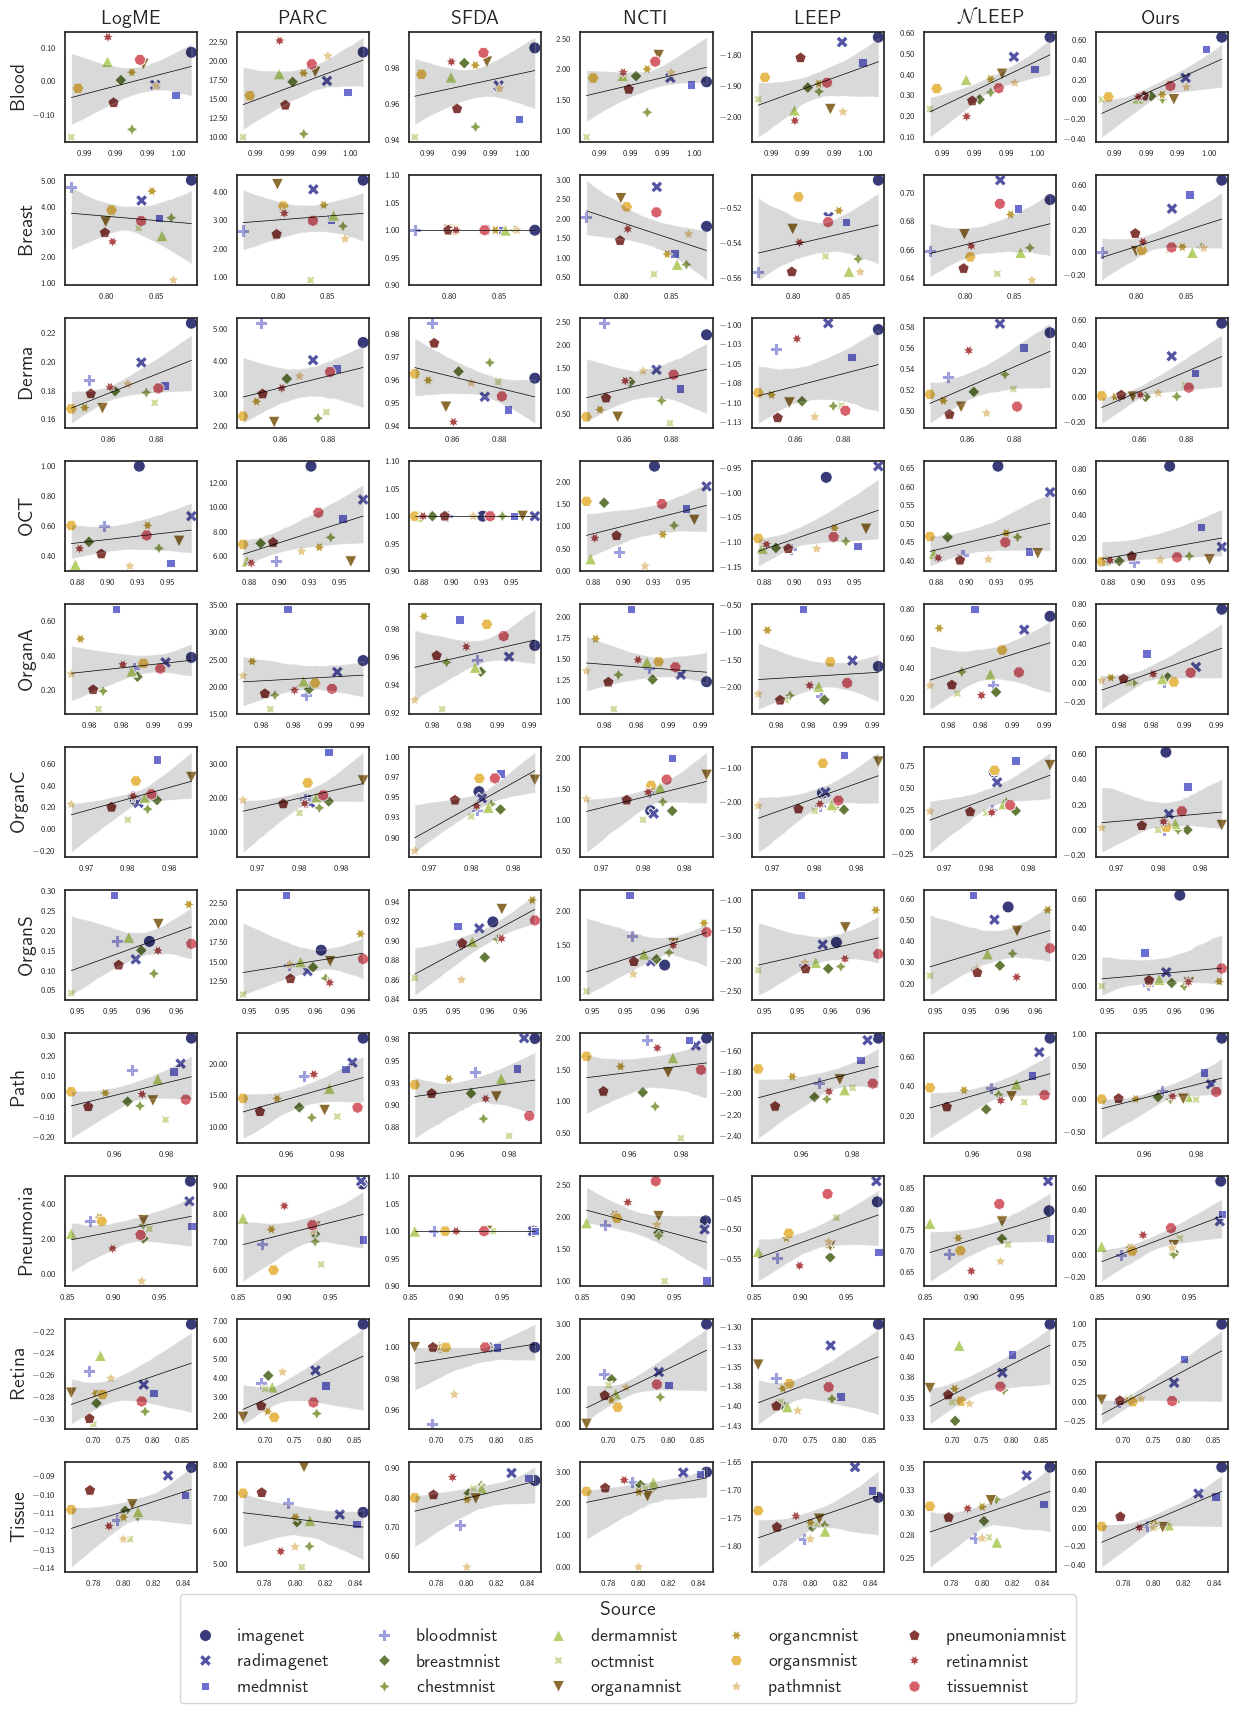

In [53]:
target_order=['bloodmnist','breastmnist','dermamnist','octmnist','organamnist','organcmnist','organsmnist','pathmnist','pneumoniamnist','retinamnist','tissuemnist']
dfs = [logme_df, parc_df, sfda_df, ncti_df, leep_df, nleep_df, lpfu]
methods = ['LogME', 'PARC', 'SFDA', 'NCTI', 'LEEP', r"$\mathcal{N}$LEEP", 'Ours']

# Extend ScalarFormatter
class MyScalarFormatter(ScalarFormatter):
    # Override '_set_format' with your own
    def _set_format(self):
        self.format = '%.2f'  # Show 2 decimals

# Set up the figure and axes
fig, axes = plt.subplots(11,7, figsize=(15,20))
plt.subplots_adjust(wspace = 0.3, hspace=0.3)

# Define the color palette
palette = sns.color_palette("tab20b")
custom_formatter = MyScalarFormatter(useMathText=True)

for i, df in enumerate(dfs):
    for row, target_flag  in enumerate(target_order):
        joined_df = pd.DataFrame({'source': results['source'], 'score': df[target_flag], 'auc': results[target_flag]})
        
        # Scatter plot with consistent markers and colors
        sns.scatterplot(ax=axes[row, i], x='auc', y='score', data=joined_df, hue='source', style='source', palette=palette,s=75)
        plot_data = joined_df[joined_df['source']!=target_flag]
        plot_data['auc'] = plot_data['auc'].astype(float)
        plot_data['score'] = plot_data['score'].astype(float)
        sns.regplot(ax=axes[row, i], x='auc', y='score', data=plot_data, scatter=False, line_kws={'color': 'black', 'lw': 0.5})
        # Set the title for each subplot
        if row == 0:
            axes[0, i].set_title(methods[i])
        if i ==2 and row in [1,3,8]:
            axes[row, i].set_ylim([0.9,1.1])
        
        # Remove x and y axis labels for cleaner presentation
        axes[row, i].set_xlabel('')
        axes[row, i].set_ylabel('')
        axes[row, i].xaxis.set_major_formatter(custom_formatter)
        axes[row, i].yaxis.set_major_formatter(custom_formatter)
        axes[row, i].tick_params(axis='both', which='major', pad=0.0, labelsize=6)
        # Hide the legend in each subplot
        axes[row, i].legend().remove()

# Adjust spacing
#plt.tight_layout()
axes[0,0].set_ylabel('Blood')
axes[1,0].set_ylabel('Breast')
axes[2,0].set_ylabel('Derma')
axes[3,0].set_ylabel('OCT')
axes[4,0].set_ylabel('OrganA')
axes[5,0].set_ylabel('OrganC')
axes[6,0].set_ylabel('OrganS')
axes[7,0].set_ylabel('Path')
axes[8,0].set_ylabel('Pneumonia')
axes[9,0].set_ylabel('Retina')
axes[10,0].set_ylabel('Tissue')
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', title="Source", bbox_to_anchor=(0.5, 0.04), ncol=5)

plt.savefig('result.pdf', bbox_inches='tight')
#plt.show()

In [7]:
target_order=['bloodmnist','breastmnist','dermamnist','octmnist','organamnist','organcmnist','organsmnist','pathmnist','pneumoniamnist','retinamnist','tissuemnist']
ktau_df = pd.DataFrame({'target': target_order})
k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': logme_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['logme'] = k_tau

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': sfda_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['sfda'] = k_tau

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': leep_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['leep'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': parc_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['parc'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': ncti_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['ncti'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': nleep_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['nleep'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': lpfu[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['our'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': lp_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['perf'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': fu_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['grads'] = k_tau
ktau_df
#ktau_df[['target', 'sfda','logme','ncti', 'perf']]
#print(ktau_df[['target', 'logme', 'parc', 'sfda', 'ncti', 'leep', 'nleep', 'our']].to_latex(index=False, formatters={"name": str.upper},float_format="{:.2f}".format,))  
#ktau_df.to_csv('ktau.csv')

,target,logme,sfda,leep,parc,ncti,nleep,our,perf,grads
0,bloodmnist,0.107977,0.296137,0.482026,0.298958,0.068120,0.748447,0.777388,0.534376,0.575533
1,breastmnist,0.219782,NaN,0.260403,0.196049,-0.150684,0.206042,0.440759,0.252593,0.384928
2,dermamnist,0.519961,-0.271453,0.229000,0.340917,0.192231,0.437743,0.701932,0.538884,0.738717
3,octmnist,0.259121,0.188116,0.517829,0.341177,0.274093,0.233829,0.452072,0.525107,0.255725
4,organamnist,0.255447,-0.001884,0.175358,0.271402,-0.264714,0.322740,0.566029,0.459053,0.447535
5,organcmnist,0.467316,0.427559,0.403950,0.499248,0.457477,0.465912,0.108590,0.513068,-0.175234
6,organsmnist,0.120056,0.656912,0.237836,0.168259,0.313617,0.102755,0.219208,0.214686,-0.042252
7,pathmnist,0.505637,0.380054,0.560906,0.538126,0.403055,0.568479,0.615297,0.471522,0.761972
8,pneumoniamnist,0.311260,NaN,0.221659,0.121000,-0.365483,0.307391,0.612253,0.065244,0.527506
9,retinamnist,0.332362,0.267265,0.344523,0.501794,0.471825,0.552549,0.602210,0.740219,0.542313


/tmp/ipykernel_108982/3165592662.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.barplot(df_long, x="tau", y="target", hue="method", palette=sns.color_palette())
/tmp/ipykernel_108982/3165592662.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(['Blood', 'Breast', 'Derma', 'OCT', 'OrganA', 'OrganC', 'OrganS', 'Path',' Pneumonia', 'Retina', 'Tissue'])


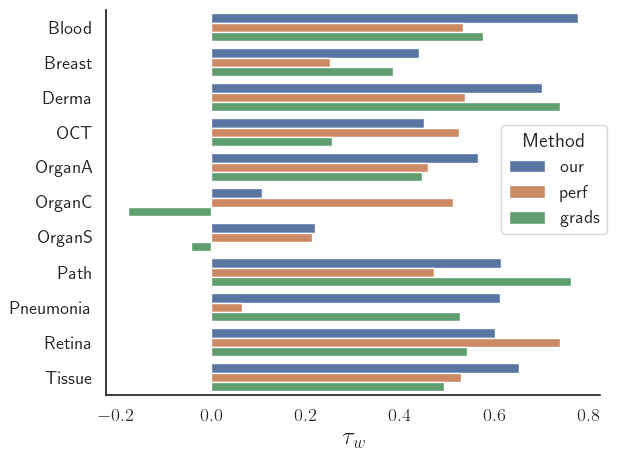

In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Cambria"
})
sns.set(font_scale=1.2)
sns.set_style("white")
df_long = ktau_df[['target','our', 'perf', 'grads']].melt(id_vars='target', var_name='method', value_name='tau')
g = sns.barplot(df_long, x="tau", y="target", hue="method", palette=sns.color_palette())
g.set_yticklabels(['Blood', 'Breast', 'Derma', 'OCT', 'OrganA', 'OrganC', 'OrganS', 'Path',' Pneumonia', 'Retina', 'Tissue'])
plt.title(r"$\tau_w$", y=-0.15, fontsize = 18)
plt.legend(bbox_to_anchor=(0.8, 0.7), loc='upper left', borderaxespad=0, title='Method')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.savefig('./results/ablation.pdf')


In [11]:
from scipy import stats
import scikit_posthocs as sp

In [10]:
rank = pd.read_csv('./results/ktau_dataset_rank.csv', sep=';')
rank

,Unnamed: 0,target,logme,sfda,leep,parc,ncti,nleep,our
0,0,bloodmnist,6,5,3,4,7,2,1
1,1,breastmnist,3,7,2,5,6,4,1
2,2,dermamnist,2,7,5,4,6,3,1
3,3,octmnist,5,7,1,3,4,6,2
4,4,organamnist,4,6,5,3,7,2,1
5,5,organcmnist,2,5,6,1,4,3,7
6,6,organsmnist,6,1,3,5,2,7,4
7,7,pathmnist,5,7,3,4,6,2,1
8,8,pneumoniamnist,2,7,4,5,6,3,1
9,9,retinamnist,6,7,5,3,4,2,1


In [14]:
stats.friedmanchisquare(rank['logme'], rank['parc'], rank['sfda'], rank['ncti'], rank['leep'], rank['nleep'], rank['our'])

FriedmanchisquareResult(statistic=20.766233766233768, pvalue=0.0020206953197507275)

In [16]:
stats.friedmanchisquare(rank['leep'], rank['nleep'], rank['our'])

FriedmanchisquareResult(statistic=7.0909090909090935, pvalue=0.028855503390388188)

In [15]:
sp.posthoc_nemenyi_friedman(rank[['leep', 'nleep','our']])

,leep,nleep,our
leep,1.000000,0.798237,0.028354
nleep,0.798237,1.000000,0.133342
our,0.028354,0.133342,1.000000


In [18]:
k=3
N=11
lookupq = [1.960,2.343,2.569, 2.728, 2.850, 2.949, 3.031, 3.102, 3.164, 3.219]
q=lookupq[k-1]
critDif=q*np.sqrt((k*(k+1))/(6*N))
critDif

1.0954252806351263